In [1]:
!pip install biopython

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 4.5 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.3 MB/s  0:00:00


In [2]:
from Bio import Entrez, SeqIO
from Bio.SeqUtils import gc_fraction
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
Entrez.email = "berrenurinandi@gmail.com"

In [17]:
# Fetching data using 'with' statement (Best Practice for resource management)
with Entrez.efetch(db="nucleotide", id="NM_000207", rettype="gb", retmode="text") as handle:
    record = SeqIO.read(handle, "genbank")

dna_seq = record.seq
print(f"Gene Description: {record.description}")

Gene Description: Homo sapiens insulin (INS), transcript variant 1, mRNA


In [18]:
print(f"Sequence Length: {len(dna_seq)} bp")
print(f"GC Content: {gc_fraction(dna_seq)*100:.2f}%")
print(f"Sequence:\n{dna_seq}")

Sequence Length: 465 bp
GC Content: 63.87%
Sequence:
AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCAAGCAGATCACTGTCCTTCTGCCATGGCCCTGTGGATGCGCCTCCTGCCCCTGCTGGCGCTGCTGGCCCTCTGGGGACCTGACCCAGCCGCAGCCTTTGTGAACCAACACCTGTGCGGCTCACACCTGGTGGAAGCTCTCTACCTAGTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGACCTGCAGGTGGGGCAGGTGGAGCTGGGCGGGGGCCCTGGTGCAGGCAGCCTGCAGCCCTTGGCCCTGGAGGGGTCCCTGCAGAAGCGTGGCATTGTGGAACAATGCTGTACCAGCATCTGCTCCCTCTACCAGCTGGAGAACTACTGCAACTAGACGCAGCCCGCAGGCAGCCCCACACCCGCCGCCTCCTGCACCGAGAGAGATGGAATAAAGCCCTTGAACCAGC


In [19]:
protein_seq = dna_seq.translate()
print(f"Protein Sequence:\n{protein_seq}")

Protein Sequence:
SPPGQAASEEAIKQITVLLPWPCGCASCPCWRCWPSGDLTQPQPL*TNTCAAHTWWKLST*CAGNEASSTHPRPAGRQRTCRWGRWSWAGALVQAACSPWPWRGPCRSVALWNNAVPASAPSTSWRTTATRRSPQAAPHPPPPAPREME*SP*TS


In [20]:
# Calculate amino acid frequencies
aa_counts = Counter(protein_seq)
print("\nMost Common Amino Acids (Top 3):")
for aa, count in aa_counts.most_common(3):
    print(f"{aa}: {count}")


Most Common Amino Acids (Top 3):
P: 23
A: 21
S: 16


In [21]:
# Get all amino acids sorted by frequency
sorted_aa_data = aa_counts.most_common()
print(f"Sorted Amino Acid Data:\n{sorted_aa_data}")

Sorted Amino Acid Data:
[('P', 23), ('A', 21), ('S', 16), ('T', 13), ('W', 12), ('R', 12), ('C', 10), ('G', 8), ('Q', 7), ('L', 7), ('E', 5), ('V', 4), ('*', 4), ('N', 4), ('H', 3), ('I', 2), ('K', 2), ('D', 1), ('M', 1)]


In [30]:
# K-mer (Motif) Analysis
# Finding a specific DNA pattern and its corresponding amino acid
target_kmer = "GGCC" # Example motif to search
position = dna_seq.find(target_kmer)

if position != -1:
        print(f"✅ Motif found at Nucleotide Position: {position}")        
        # Extract the codon (3 bases) starting from that position
        # Note: This assumes the reading frame starts at the motif for demonstration
        codon = dna_seq[position : position+3]
        encoded_aa = codon.translate()        
        print(f"   -> DNA Codon at site: {codon}")
        print(f"   -> Encoded Amino Acid: {encoded_aa} (based on local translation)")
else:
        print("❌ Motif not found in this sequence.")

✅ Motif found at Nucleotide Position: 29
   -> DNA Codon at site: GGC
   -> Encoded Amino Acid: G (based on local translation)


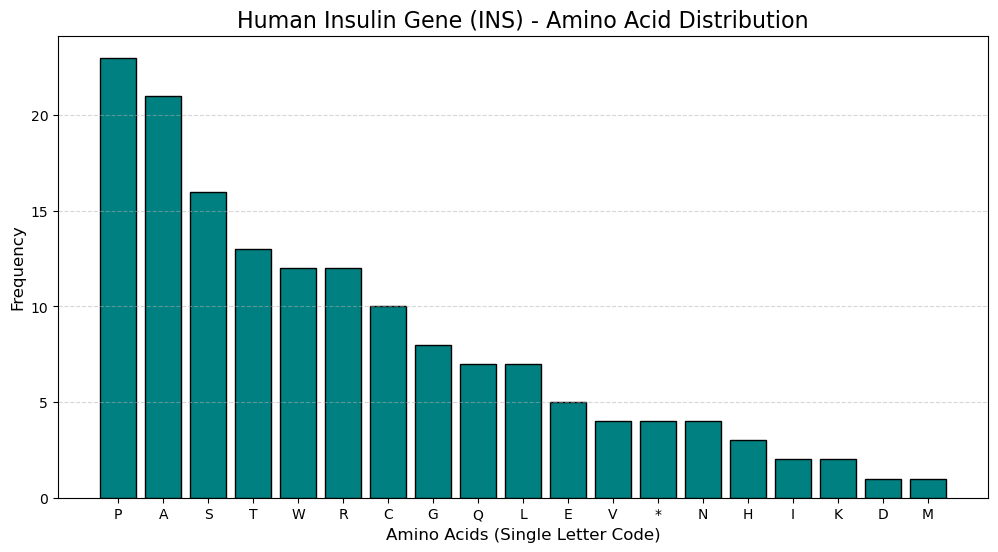

In [32]:
labels = [x[0] for x in sorted_aa_data]
values = [x[1] for x in sorted_aa_data]

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='teal', edgecolor='black')
    
plt.title("Human Insulin Gene (INS) - Amino Acid Distribution", fontsize=16)
plt.xlabel("Amino Acids (Single Letter Code)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
    
# Show the plot
plt.show()